In [10]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import pickle
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import vae
from shape import Circle, Triangle, NoisyShape, Rectangle, Diamond, Heart, Oval, RotatedShape, Star, Pentagon

In [11]:
num_shapes = 100
shapes = []

for _ in tqdm(range(num_shapes)):
    shape_type = np.random.choice(
        ['Circle', 'Triangle', 'Rectangle', 'Diamond', 'Heart', 'Oval', 'Star', 'Pentagon'])

    if shape_type == 'Circle':
        shape = Circle(n_points=100)

    if shape_type == 'Triangle':
        shape = Triangle(n_points=100)

    if shape_type == 'Rectangle':
        shape = Rectangle(n_points=100)


    if shape_type == 'Diamond':
        shape = Diamond(n_points=100)


    if shape_type == 'Heart':
        shape = Heart(n_points=100)


    if shape_type == 'Star':
        shape = Star(n_points=100)


    if shape_type == 'Oval':
        shape = Oval(n_points=100)


    if shape_type == 'Pentagon':
        shape = Pentagon(n_points=100)

    if np.random.rand() > 0.5:
        shape = RotatedShape(shape, max_rotation=360)

    if np.random.rand() > 0.7:
        noise_fraction = np.random.uniform(0.1, 0.6)
        shape = NoisyShape(shape, noise_level=np.random.uniform(
            0.01, 0.05), noise_fraction=noise_fraction)
    # shape.plot()
    # if np.random.rand() > 0.3:
    #     shape = Shape.skew(shape.points)

    shapes.append(shape)

100%|██████████| 100/100 [00:00<00:00, 5199.40it/s]


In [ ]:
with open('/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/04-data/shapes_dataset.pkl','wb') as f:
    pickle.dump(shapes,f)

with open(r'/Users/joshuahellewell/Desktop/02-msc/01-modules/MSc Project - 771952/04-data/shapes_dataset.pkl', "rb") as f:
    shapes = pickle.load(f)

97


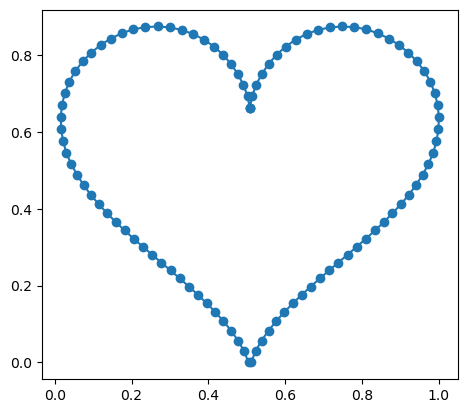

3.1170131393906493
0.5355030621187158
5.820719543709421


In [12]:
no = np.random.randint(0,100)
print(no)
a = vae.Metrics(shapes[no].points)
shapes[no].plot()
print(a.get_perimeter())
print(a.get_area())
print(a.compute_compactness())

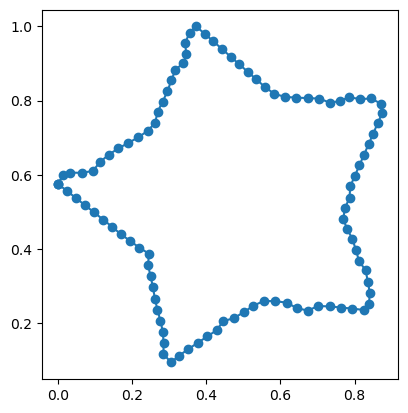

2.9881020884827794
0.4088860076509526
7.307909863801419


In [ ]:
no = np.random.randint(0,100)
print(no)
a = vae.Metrics(shapes[no].points)
shapes[80].plot()
print(a.get_perimeter())
print(a.get_area())
print(a.compute_compactness())

In [3]:
dataset = vae.ShapeData(shapes)
dataloader = DataLoader(dataset,batch_size=128,shuffle=True)

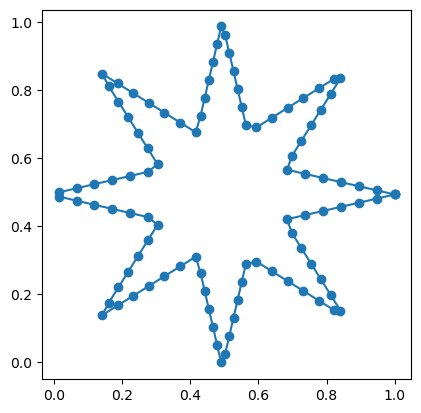

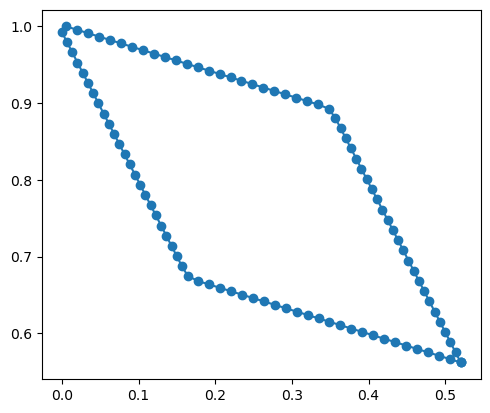

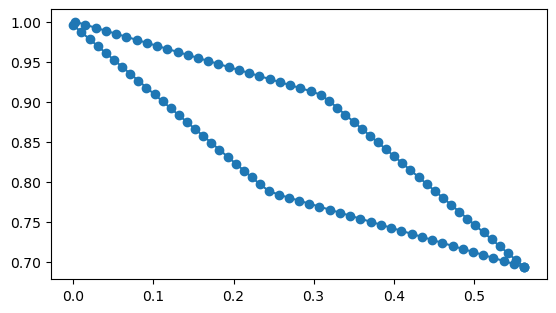

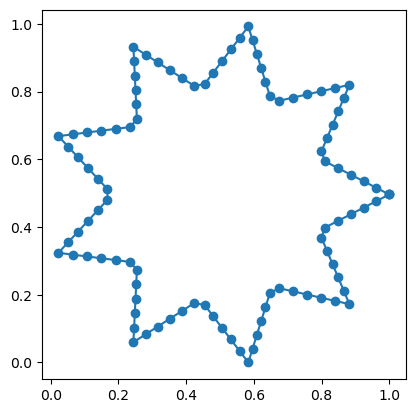

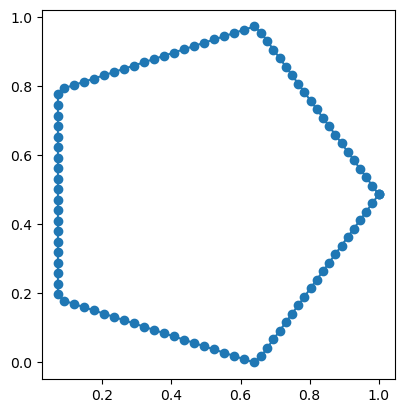

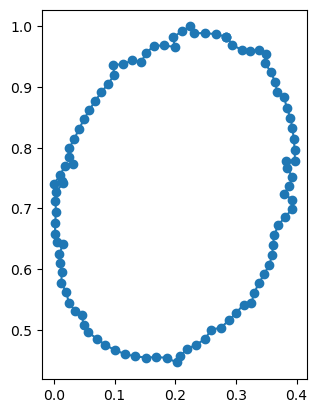

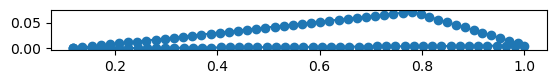

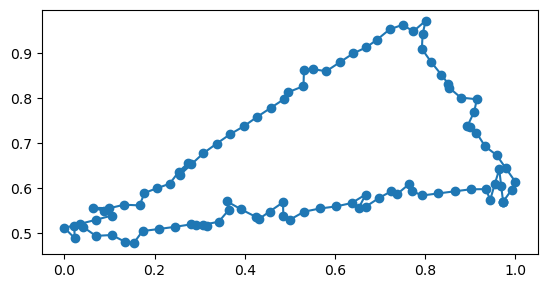

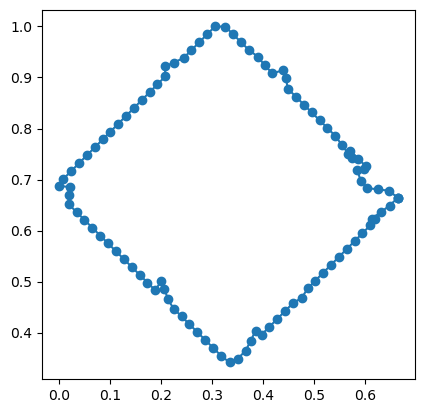

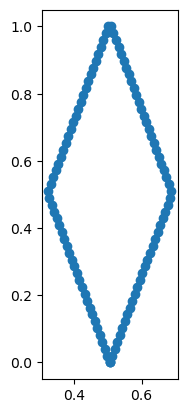

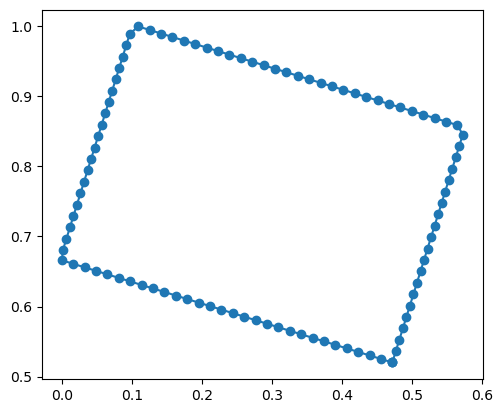

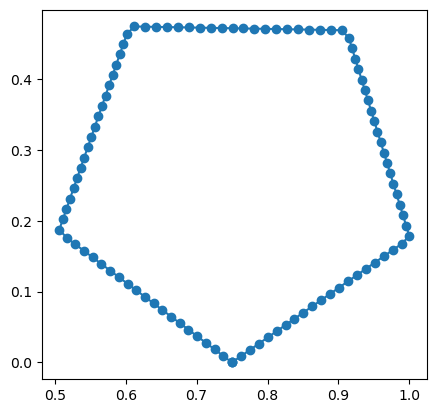

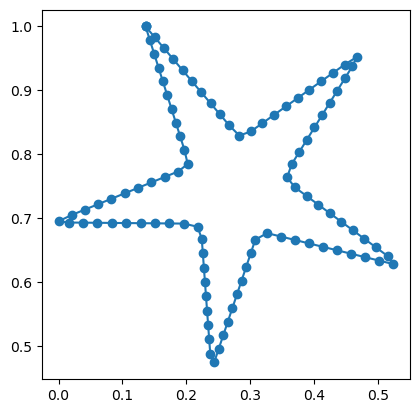

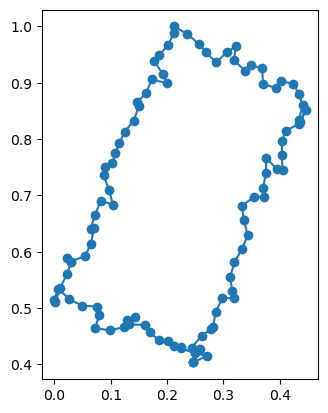

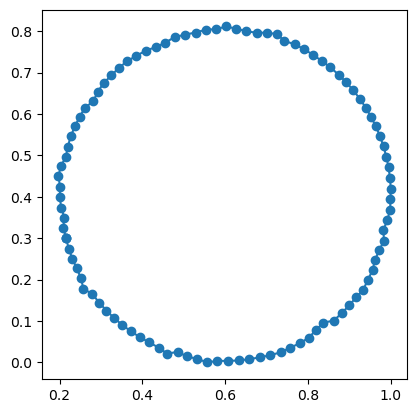

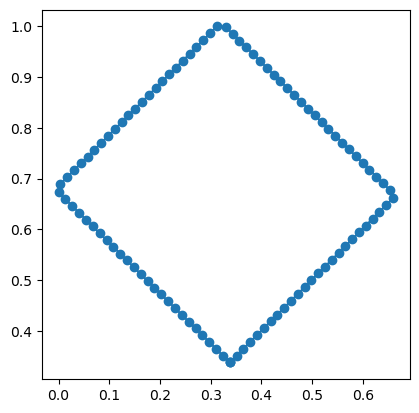

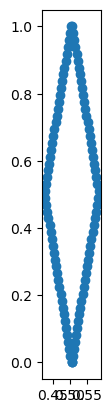

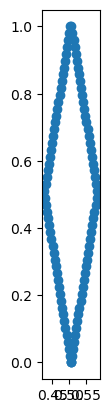

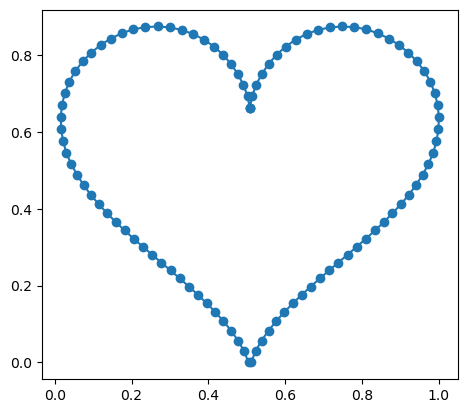

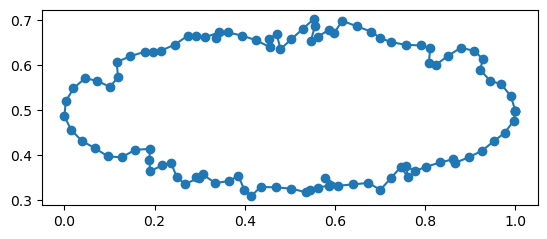

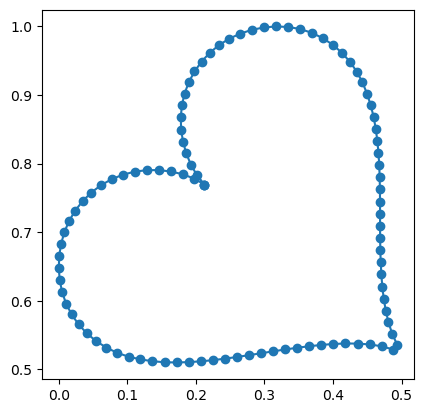

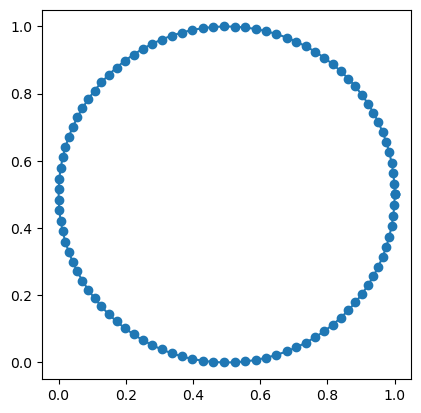

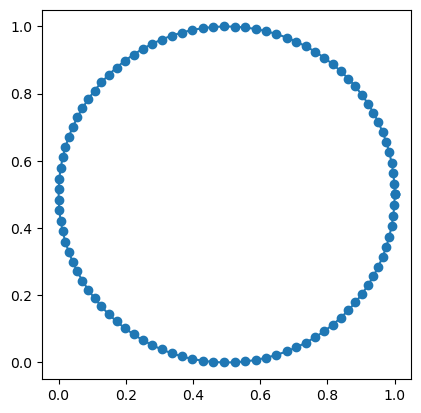

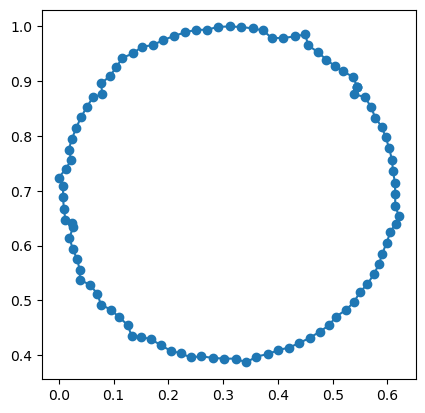

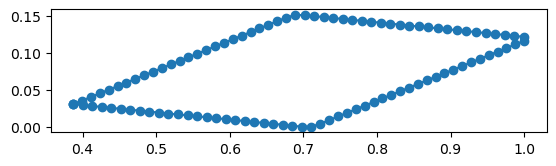

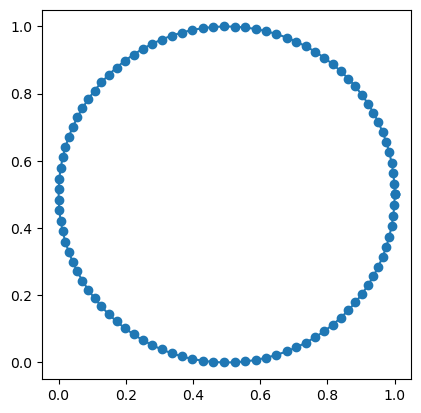

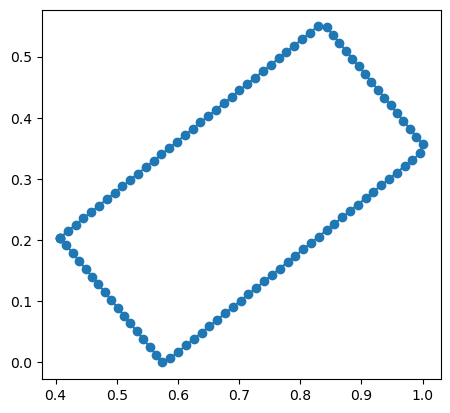

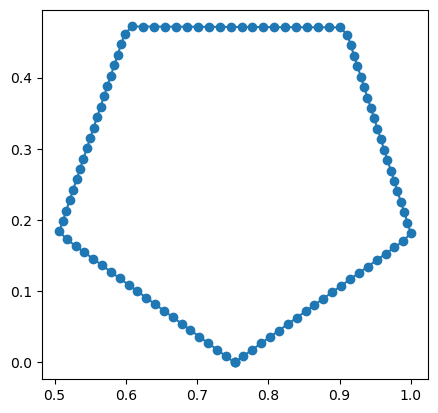

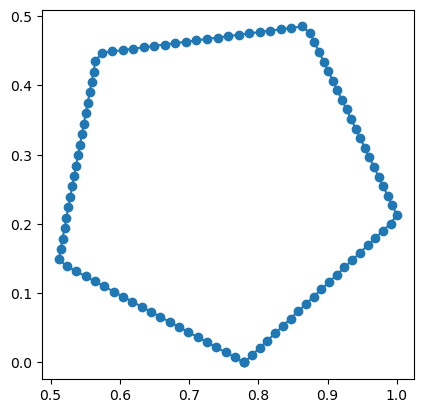

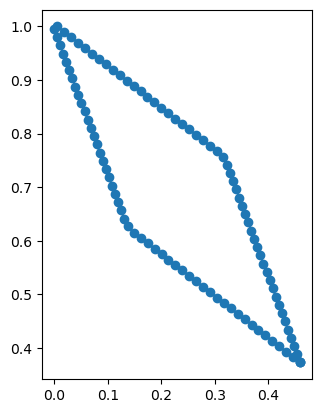

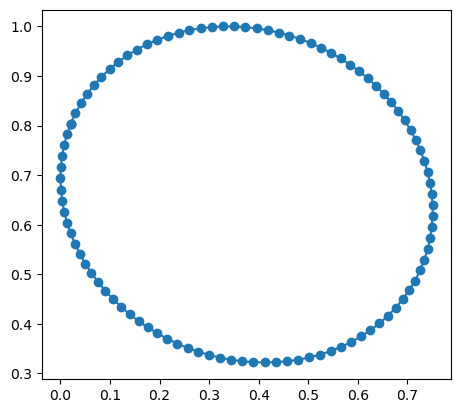

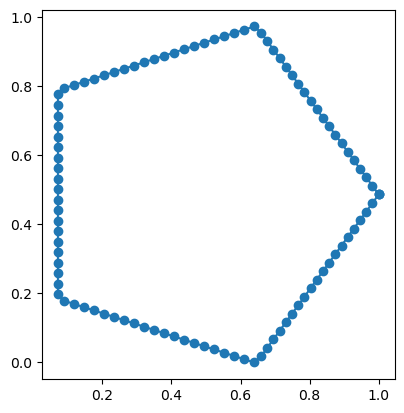

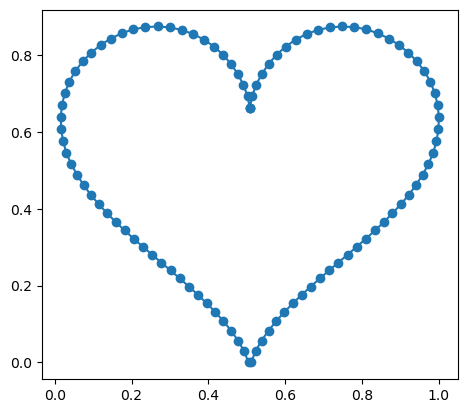

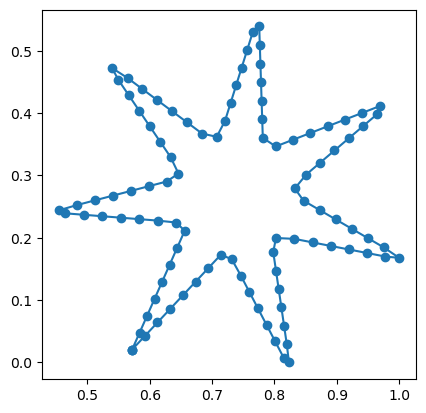

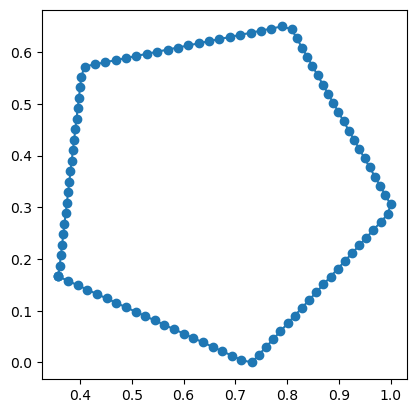

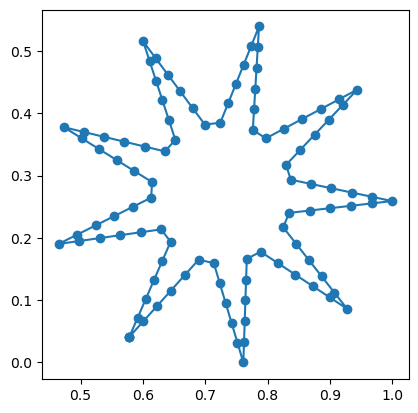

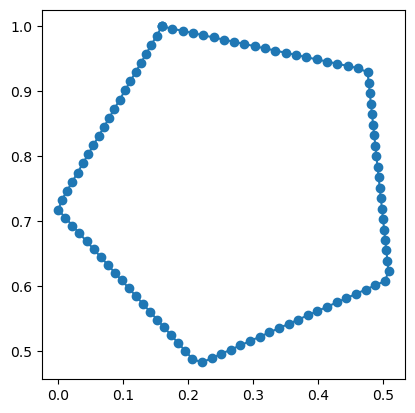

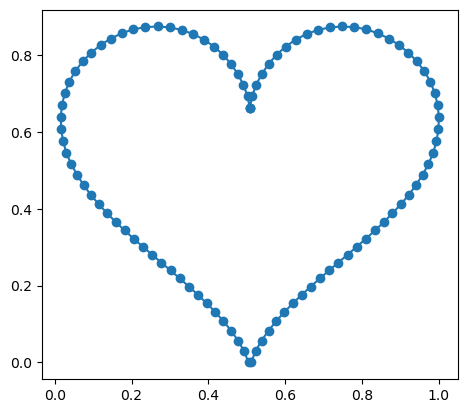

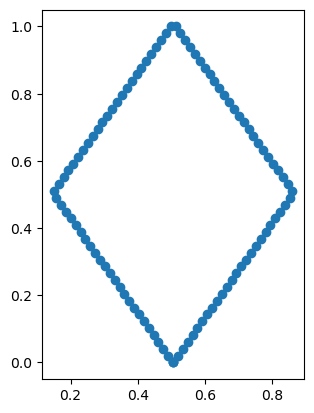

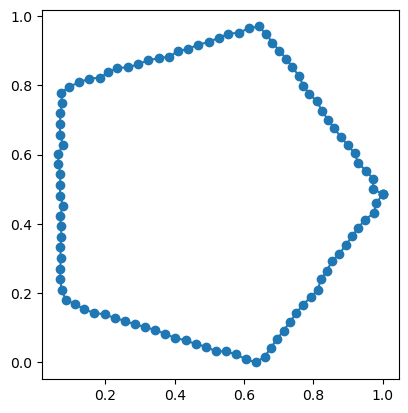

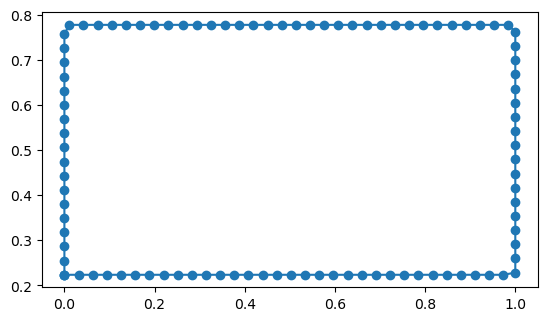

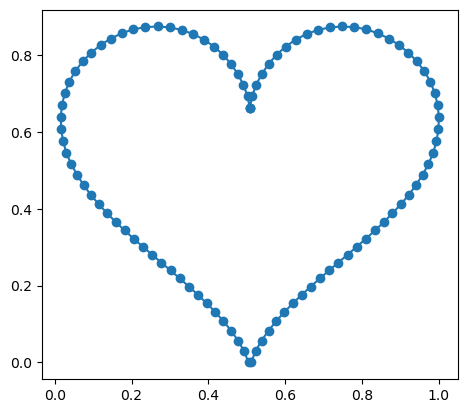

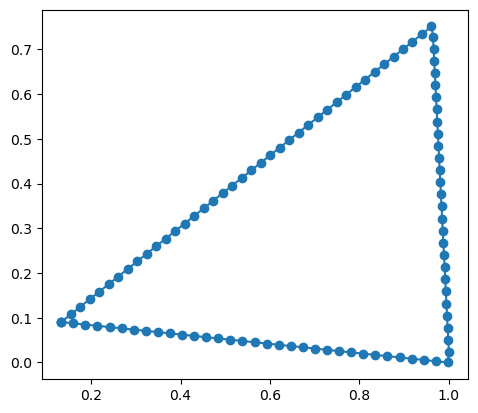

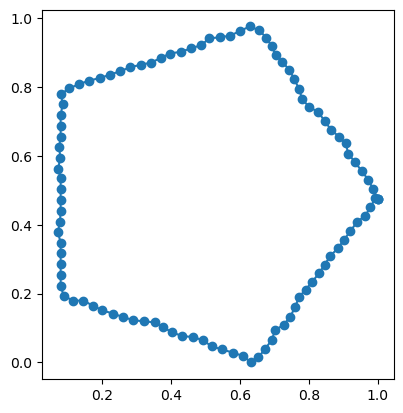

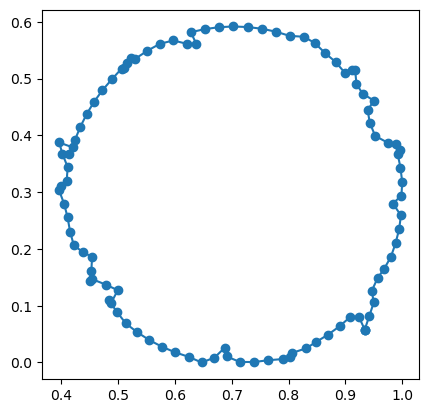

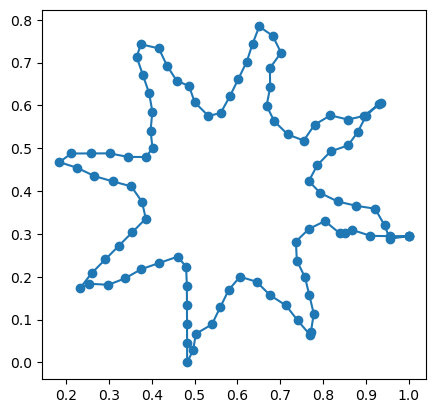

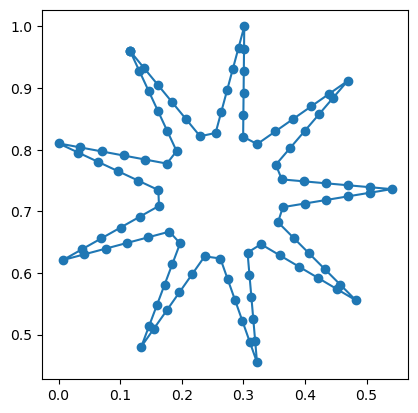

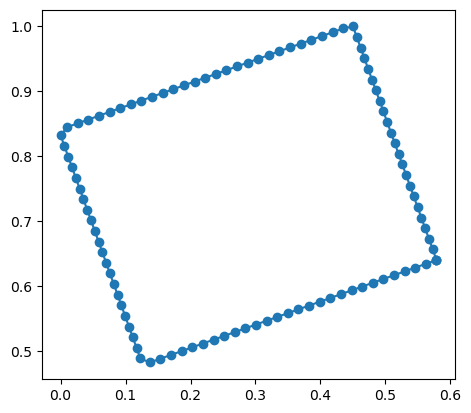

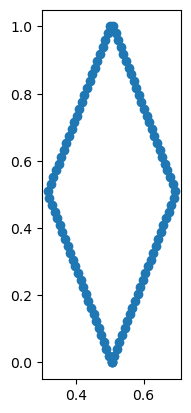

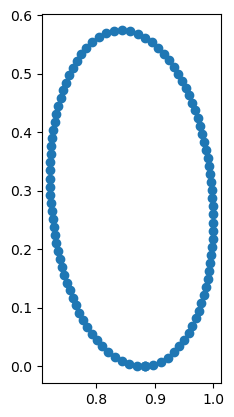

In [4]:
for i in range(0,50):
    shapes[i].plot()

In [27]:
model = vae.VAE(latent_dim=2)

In [6]:
trainer = vae.Trainer(dataset,model,lr=0.001)

In [9]:
model

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=200, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
  )
  (fc_mu): Linear(in_features=64, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=64, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=200, bias=True)
  )
)

In [10]:
trainer.train_model(100)

Epoch 1, Loss: 5524.378311157227
Epoch 2, Loss: 5415.310684204102
Epoch 3, Loss: 5424.322891235352
Epoch 4, Loss: 5001.061935424805
Epoch 5, Loss: 5091.854690551758
Epoch 6, Loss: 4986.701095581055
Epoch 7, Loss: 4850.951110839844
Epoch 8, Loss: 4764.706809997559
Epoch 9, Loss: 4965.50936126709
Epoch 10, Loss: 4936.184257507324
Epoch 11, Loss: 5051.742988586426
Epoch 12, Loss: 4981.557289123535
Epoch 13, Loss: 4919.612098693848
Epoch 14, Loss: 4784.403999328613
Epoch 15, Loss: 4640.873252868652
Epoch 16, Loss: 4536.334693908691
Epoch 17, Loss: 4810.82780456543
Epoch 18, Loss: 4690.543388366699
Epoch 19, Loss: 4647.271644592285
Epoch 20, Loss: 4581.929161071777
Epoch 21, Loss: 4412.4959716796875
Epoch 22, Loss: 4636.555648803711
Epoch 23, Loss: 4471.906173706055
Epoch 24, Loss: 4498.976890563965
Epoch 25, Loss: 4651.10750579834
Epoch 26, Loss: 4838.103775024414
Epoch 27, Loss: 4668.175430297852
Epoch 28, Loss: 4597.292060852051
Epoch 29, Loss: 4597.514801025391
Epoch 30, Loss: 4516.5870

In [39]:
model.eval()
with torch.no_grad():
    z = torch.randn(10,2).to(device)
    new_shapes = model.decoder(z).cpu().numpy().reshape(-1,100,2)